In [1]:
!pwd

/Users/akodaka/Dropbox/MIDS Program/W200 Python Fundamentals for Data Science/group_project/group-project-braun-harrington-kodaka


In [2]:
#Leveraged code from class.  Download the California data (not to your repo!) and load it into a dataframe
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

In [3]:
#contrib = pd.read_csv('qqq_USA_header.dat', index_col=False)
# Note - for now, it is okay to ignore the warning about mixed types.  
#Make sure that your file name matches what is here.
PISA = pd.read_csv('qqq.dat', index_col=False)

/Users/akodaka/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,26,27,29,31,32,33,34,36,37,38,39,40,42,44,55,62,63,64,68,69,72,73,74,75,76,79,80,84,85,89,93,95,97,100,101,102,107,111,118,119,120,127,129,130,131,132,133,134,135,136,137,138,139,140,144,149,151,153,156,158,160,161,162,175,194,198,199,201,211,212,213,217,218,225,226,248,249,260,270,640,642,643,644,645,646,647,649,655,656,658,660,661,662,668,675,676,677,678,679,680,711,712,716,721,722,723,724,725,807,808,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
PISA.head(10)

,['CNTRYID','CNT','CNTSCHID','CNTSTUID','CYC','NatCen','Region','STRATUM','SUBNATIO','OECD',...,'PV3SSES','PV4SSES','PV5SSES','PV6SSES','PV7SSES','PV8SSES','PV9SSES','PV10SSES','SENWT','VER_DAT']
0,[8.0,'ALB',"800,001.00","803,627.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
1,[8.0,'ALB',"800,001.00","800,454.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
2,[8.0,'ALB',"800,001.00","800,893.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
3,[8.0,'ALB',"800,001.00","804,180.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
4,[8.0,'ALB',"800,001.00","800,491.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
5,[8.0,'ALB',"800,001.00","804,249.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
6,[8.0,'ALB',"800,001.00","804,935.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
7,[8.0,'ALB',"800,001.00","804,320.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
8,[8.0,'ALB',"800,001.00","804,054.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']
9,[8.0,'ALB',"800,001.00","800,189.00",'06MS','000800',800.00,'ALB0005','0080000',0.00,...,None,None,None,None,None,None,None,None,2.18,'15NOV16:10:10:29']


In [5]:
#Set up column names
mylist=[
'CNTRYID',
'CNT',
'CNTSCHID',
'CNTSTUID',
'CYC',
'NatCen',
'Region',
'STRATUM',
'SUBNATIO',
'OECD',
'ADMINMODE',
'Option_CPS',
'Option_FL',
'Option_ICTQ',
'Option_ECQ',
'Option_PQ',
'Option_TQ',
'Option_UH',
'Option_Read',
'Option_Math',
'LANGTEST_QQQ',
'LANGTEST_COG',
'LANGTEST_PAQ',
'CBASCI',
'BOOKID',
'ST001D01T',
'ST003D02T',
'ST003D03T',
'ST004D01T',
'ST005Q01TA',
'ST006Q01TA',
'ST006Q02TA',
'ST006Q03TA',
'ST006Q04TA',
'ST007Q01TA',
'ST008Q01TA',
'ST008Q02TA',
'ST008Q03TA',
'ST008Q04TA',
'ST011Q01TA',
'ST011Q02TA',
'ST011Q03TA',
'ST011Q04TA',
'ST011Q05TA',
'ST011Q06TA',
'ST011Q07TA',
'ST011Q08TA',
'ST011Q09TA',
'ST011Q10TA',
'ST011Q11TA',
'ST011Q12TA',
'ST011Q16NA',
'ST011D17TA',
'ST011D18TA',
'ST011D19TA',
'ST012Q01TA',
'ST012Q02TA',
'ST012Q03TA',
'ST012Q05NA',
'ST012Q06NA',
'ST012Q07NA',
'ST012Q08NA',
'ST012Q09NA',
'ST013Q01TA',
'ST123Q01NA',
'ST123Q02NA',
'ST123Q03NA',
'ST123Q04NA',
'ST019AQ01T',
'ST019BQ01T',
'ST019CQ01T',
'ST021Q01TA',
'ST022Q01TA',
'ST124Q01TA',
'ST125Q01NA',
'ST126Q01TA',
'ST127Q01TA',
'ST127Q02TA',
'ST127Q03TA',
'ST111Q01TA',
'ST118Q01NA',
'ST118Q02NA',
'ST118Q03NA',
'ST118Q04NA',
'ST118Q05NA',
'ST119Q01NA',
'ST119Q02NA',
'ST119Q03NA',
'ST119Q04NA',
'ST119Q05NA',
'ST121Q01NA',
'ST121Q02NA',
'ST121Q03NA',
'ST082Q01NA',
'ST082Q02NA',
'ST082Q03NA',
'ST082Q08NA',
'ST082Q09NA',
'ST082Q12NA',
'ST082Q13NA',
'ST082Q14NA',
'ST034Q01TA',
'ST034Q02TA',
'ST034Q03TA',
'ST034Q04TA',
'ST034Q05TA',
'ST034Q06TA',
'ST039Q01NA',
'ST039Q02NA',
'ST039Q03NA',
'ST039Q04NA',
'ST039Q05NA',
'ST039Q06NA',
'ST059Q01TA',
'ST059Q02TA',
'ST059Q03TA',
'ST060Q01NA',
'ST061Q01NA',
'ST062Q01TA',
'ST062Q02TA',
'ST062Q03TA',
'ST071Q01NA',
'ST071Q02NA',
'ST071Q03NA',
'ST071Q04NA',
'ST071Q05NA',
'ST031Q01NA',
'ST032Q01NA',
'ST032Q02NA',
'ST063Q01NA',
'ST063Q01NB',
'ST063Q02NA',
'ST063Q02NB',
'ST063Q03NA',
'ST063Q03NB',
'ST063Q04NA',
'ST063Q04NB',
'ST063Q05NA',
'ST063Q05NB',
'ST063Q06NA',
'ST063Q06NB',
'ST064Q01NA',
'ST064Q02NA',
'ST064Q03NA',
'ST097Q01TA',
'ST097Q02TA',
'ST097Q03TA',
'ST097Q04TA',
'ST097Q05TA',
'ST098Q01TA',
'ST098Q02TA',
'ST098Q03NA',
'ST098Q05TA',
'ST098Q06TA',
'ST098Q07TA',
'ST098Q08NA',
'ST098Q09TA',
'ST098Q10NA',
'ST100Q01TA',
'ST100Q02TA',
'ST100Q03TA',
'ST100Q04TA',
'ST100Q05TA',
'ST103Q01NA',
'ST103Q03NA',
'ST103Q08NA',
'ST103Q11NA',
'ST104Q01NA',
'ST104Q02NA',
'ST104Q03NA',
'ST104Q04NA',
'ST104Q05NA',
'ST107Q01NA',
'ST107Q02NA',
'ST107Q03NA',
'ST092Q01TA',
'ST092Q02TA',
'ST092Q04TA',
'ST092Q05TA',
'ST092Q06NA',
'ST092Q08NA',
'ST092Q09NA',
'ST093Q01TA',
'ST093Q03TA',
'ST093Q04TA',
'ST093Q05TA',
'ST093Q06TA',
'ST093Q07NA',
'ST093Q08NA',
'ST094Q01NA',
'ST094Q02NA',
'ST094Q03NA',
'ST094Q04NA',
'ST094Q05NA',
'ST095Q04NA',
'ST095Q07NA',
'ST095Q08NA',
'ST095Q13NA',
'ST095Q15NA',
'ST113Q01TA',
'ST113Q02TA',
'ST113Q03TA',
'ST113Q04TA',
'ST129Q01TA',
'ST129Q02TA',
'ST129Q03TA',
'ST129Q04TA',
'ST129Q05TA',
'ST129Q06TA',
'ST129Q07TA',
'ST129Q08TA',
'ST131Q01NA',
'ST131Q03NA',
'ST131Q04NA',
'ST131Q06NA',
'ST131Q08NA',
'ST131Q11NA',
'ST146Q01TA',
'ST146Q02TA',
'ST146Q03TA',
'ST146Q04TA',
'ST146Q05TA',
'ST146Q06NA',
'ST146Q07NA',
'ST146Q08NA',
'ST146Q09NA',
'ST076Q01NA',
'ST076Q02NA',
'ST076Q03NA',
'ST076Q04NA',
'ST076Q05NA',
'ST076Q06NA',
'ST076Q07NA',
'ST076Q08NA',
'ST076Q09NA',
'ST076Q10NA',
'ST076Q11NA',
'ST078Q01NA',
'ST078Q02NA',
'ST078Q03NA',
'ST078Q04NA',
'ST078Q05NA',
'ST078Q06NA',
'ST078Q07NA',
'ST078Q08NA',
'ST078Q09NA',
'ST078Q10NA',
'ST078Q11NA',
'ST065Class',
'IC001Q01TA',
'IC001Q02TA',
'IC001Q03TA',
'IC001Q04TA',
'IC001Q05TA',
'IC001Q06TA',
'IC001Q07TA',
'IC001Q08TA',
'IC001Q09TA',
'IC001Q10TA',
'IC001Q11TA',
'IC009Q01TA',
'IC009Q02TA',
'IC009Q03TA',
'IC009Q05NA',
'IC009Q06NA',
'IC009Q07NA',
'IC009Q08TA',
'IC009Q09TA',
'IC009Q10NA',
'IC009Q11NA',
'IC002Q01NA',
'IC003Q01TA',
'IC004Q01TA',
'IC005Q01TA',
'IC006Q01TA',
'IC007Q01TA',
'IC008Q01TA',
'IC008Q02TA',
'IC008Q03TA',
'IC008Q04TA',
'IC008Q05TA',
'IC008Q07NA',
'IC008Q08TA',
'IC008Q09TA',
'IC008Q10TA',
'IC008Q11TA',
'IC008Q12TA',
'IC008Q13NA',
'IC010Q01TA',
'IC010Q02NA',
'IC010Q03TA',
'IC010Q04TA',
'IC010Q05NA',
'IC010Q06NA',
'IC010Q07TA',
'IC010Q08TA',
'IC010Q09NA',
'IC010Q10NA',
'IC010Q11NA',
'IC010Q12NA',
'IC011Q01TA',
'IC011Q02TA',
'IC011Q03TA',
'IC011Q04TA',
'IC011Q05TA',
'IC011Q06TA',
'IC011Q07TA',
'IC011Q08TA',
'IC011Q09TA',
'IC013Q01NA',
'IC013Q04NA',
'IC013Q05NA',
'IC013Q11NA',
'IC013Q12NA',
'IC013Q13NA',
'IC014Q03NA',
'IC014Q04NA',
'IC014Q06NA',
'IC014Q08NA',
'IC014Q09NA',
'IC015Q02NA',
'IC015Q03NA',
'IC015Q05NA',
'IC015Q07NA',
'IC015Q09NA',
'IC016Q01NA',
'IC016Q02NA',
'IC016Q04NA',
'IC016Q05NA',
'IC016Q07NA',
'EC001Q01NA',
'EC001Q02NA',
'EC001Q03NA',
'EC001Q04NA',
'EC001Q05NA',
'EC001Q06NA',
'EC001Q07NA',
'EC001Q08NA',
'EC001Q09NA',
'EC001Q10NA',
'EC003Q01NA',
'EC003Q02NA',
'EC003Q03NA',
'EC003Q04NA',
'EC003Q05NA',
'EC003Q06NA',
'EC004Q01NA',
'EC004Q02NA',
'EC005Q01NA',
'EC005Q02NA',
'EC005Q03NA',
'EC005Q04NA',
'EC005Q05NA',
'EC005Q06NA',
'EC005Q07NA',
'EC005Q08NA',
'EC007Q01NA',
'EC007Q02NA',
'EC008Q01NA',
'EC008Q02NA',
'EC008Q03NA',
'EC008Q04NA',
'EC009Q03NA',
'EC009Q07NA',
'EC009Q10NA',
'EC009Q12NA',
'EC009Q13NA',
'EC009Q14NA',
'EC010Q04NA',
'EC010Q06NA',
'EC010Q07NA',
'EC010Q08NA',
'EC010Q09NA',
'EC010Q10NA',
'EC010Q11NA',
'EC010Q12NA',
'EC011Q01NA',
'EC011Q02NA',
'EC011Q03NA',
'EC011Q04NA',
'EC011Q05NA',
'EC012Q01NA',
'EC012Q02NA',
'EC012Q03NA',
'EC012Q04NA',
'EC012Q05NA',
'EC012Q06NA',
'EC012Q07NA',
'EC012Q08NA',
'EC012Q09NA',
'EC012Q10NA',
'EC012Q11NA',
'EC012Q12NA',
'EC013Q01NA',
'EC013Q02NA',
'EC013Q03NA',
'EC013Q04NA',
'EC013Q05NA',
'EC013Q06NA',
'EC013Q07NA',
'EC013Q08NA',
'EC013Q09NA',
'EC013Q10NA',
'EC013Q11NA',
'EC013Q12NA',
'EC013Q13NA',
'EC014Q01NA',
'EC014Q02NA',
'EC015Q01NA',
'EC015Q02NA',
'EC015Q03NA',
'EC015Q04NA',
'EC015Q05NA',
'EC015Q06NA',
'EC015Q07NA',
'EC015Q08NA',
'EC017Q01NA',
'EC017Q02NA',
'EC018Q01NA',
'EC018Q02NA',
'EC018Q03NA',
'EC018Q04NA',
'EC019Q03NA',
'EC019Q07NA',
'EC019Q10NA',
'EC019Q12NA',
'EC019Q13NA',
'EC019Q14NA',
'EC020Q04NA',
'EC020Q06NA',
'EC020Q07NA',
'EC020Q08NA',
'EC020Q09NA',
'EC020Q10NA',
'EC020Q11NA',
'EC020Q12NA',
'EC021Q01NA',
'EC021Q02NA',
'EC021Q03NA',
'EC021Q04NA',
'EC021Q05NA',
'EC022Q01NA',
'EC022Q02NA',
'EC022Q03NA',
'EC022Q04NA',
'EC022Q05NA',
'EC022Q06NA',
'EC022Q07NA',
'EC022Q08NA',
'EC022Q09NA',
'EC022Q10NA',
'EC022Q11NA',
'EC022Q12NA',
'EC023Q01NA',
'EC023Q02NA',
'EC023Q03NA',
'EC023Q04NA',
'EC023Q05NA',
'EC023Q06NA',
'EC023Q07NA',
'EC023Q08NA',
'EC023Q09NA',
'EC023Q10NA',
'EC023Q11NA',
'EC023Q12NA',
'EC023Q13NA',
'EC024Q01NA',
'EC024Q02NA',
'EC024Q03NA',
'EC024Q04NA',
'EC024Q05NA',
'EC024Q06NA',
'EC024Q07NA',
'EC024Q08NA',
'EC026Q01NA',
'EC026Q02NA',
'EC027Q01NA',
'EC027Q02NA',
'EC027Q03NA',
'EC027Q04NA',
'EC028Q01NA',
'EC028Q02NA',
'EC028Q03NA',
'EC029Q01NA',
'EC030Q01NA',
'EC030Q02NA',
'EC030Q03NA',
'EC030Q04NA',
'EC030Q05NA',
'EC030Q06NA',
'EC030Q07NA',
'EC031Q01TA',
'EC032Q01TA',
'EC033Q01NA',
'PA001Q01TA',
'PA001Q02TA',
'PA001Q03TA',
'PA002Q01TA',
'PA002Q02TA',
'PA002Q03TA',
'PA002Q04TA',
'PA002Q05TA',
'PA002Q06NA',
'PA002Q07NA',
'PA002Q08NA',
'PA002Q09NA',
'PA002Q10NA',
'PA003Q01TA',
'PA003Q02TA',
'PA003Q03TA',
'PA003Q04NA',
'PA003Q05NA',
'PA003Q06NA',
'PA003Q07NA',
'PA003Q08NA',
'PA004Q01NA',
'PA004Q02NA',
'PA004Q03NA',
'PA004Q04NA',
'PA005Q01TA',
'PA006Q01TA',
'PA006Q02TA',
'PA006Q03TA',
'PA006Q04TA',
'PA006Q05TA',
'PA006Q06TA',
'PA006Q07TA',
'PA006Q08TA',
'PA006Q09TA',
'PA006Q10TA',
'PA006Q11TA',
'PA007Q01TA',
'PA007Q02TA',
'PA007Q03TA',
'PA007Q04TA',
'PA007Q05TA',
'PA007Q06TA',
'PA007Q07TA',
'PA007Q09NA',
'PA007Q11NA',
'PA007Q12NA',
'PA007Q13NA',
'PA007Q14NA',
'PA007Q15NA',
'PA008Q01TA',
'PA008Q02TA',
'PA008Q03TA',
'PA008Q04TA',
'PA008Q05TA',
'PA008Q06NA',
'PA008Q07NA',
'PA008Q08NA',
'PA008Q09NA',
'PA008Q10NA',
'PA009Q01NA',
'PA009Q02NA',
'PA009Q03NA',
'PA009Q04NA',
'PA009Q05NA',
'PA009Q06NA',
'PA009Q08NA',
'PA009Q09NA',
'PA009Q10NA',
'PA009Q11NA',
'PA011Q01NA',
'PA011Q02NA',
'PA011Q03NA',
'PA014Q01NA',
'PA018Q01NA',
'PA018Q02NA',
'PA018Q03NA',
'PA019Q01NA',
'PA019Q02NA',
'PA019Q03NA',
'PA019Q04NA',
'PA019Q05NA',
'PA019Q06NA',
'PA019Q07NA',
'PA019Q08NA',
'PA020Q01NA',
'PA020Q02NA',
'PA020Q03NA',
'PA020Q04NA',
'PA021Q01NA',
'PA021Q02NA',
'PA021Q03NA',
'PA021Q04NA',
'PA022Q01NA',
'PA023Q01NA',
'PA023Q02NA',
'PA023Q03NA',
'PA023Q04NA',
'PA023Q05NA',
'PA023Q06NA',
'PA023Q07NA',
'PA023Q08NA',
'PA026Q01NA',
'PA027Q01NA',
'PA027Q02NA',
'PA027Q03NA',
'PA027Q04NA',
'PA027Q05NA',
'PA027Q06NA',
'PA027Q07NA',
'PA027Q08NA',
'PA028Q01NA',
'PA029Q01NA',
'PA030Q01NA',
'PA032Q01TA',
'PA032Q02TA',
'PA032Q03TA',
'PA032Q04TA',
'PA032Q05TA',
'PA033Q02TA',
'PA033Q06TA',
'PA033Q07TA',
'PA033Q08TA',
'PA033Q09TA',
'PA035Q01TA',
'PA035Q03TA',
'PA035Q04TA',
'PA035Q05TA',
'PA035Q06TA',
'PA035Q07NA',
'PA035Q08NA',
'PA036Q01TA',
'PA036Q03TA',
'PA036Q04TA',
'PA036Q05TA',
'PA036Q06TA',
'PA036Q07NA',
'PA036Q08NA',
'PA039Q01TA',
'PA039Q02TA',
'PA039Q03TA',
'PA039Q04TA',
'PA039Q05TA',
'PA039Q06TA',
'PA041Q01TA',
'PA042Q01TA',
'AGE',
'PROGN',
'ISCEDL',
'ISCEDD',
'ISCEDO',
'DISCLISCI',
'TEACHSUP',
'IBTEACH',
'TDTEACH',
'ENVAWARE',
'ENVOPT',
'JOYSCIE',
'INTBRSCI',
'INSTSCIE',
'SCIEEFF',
'EPIST',
'SCIEACT',
'BSMJ',
'GRADE',
'IMMIG',
'MISCED',
'FISCED',
'HISCED',
'HOMESCH',
'ENTUSE',
'BMMJ1',
'BFMJ2',
'hisei',
'REPEAT',
'DURECEC',
'OUTHOURS',
'MMINS',
'LMINS',
'SMINS',
'TMINS',
'BELONG',
'ANXTEST',
'MOTIVAT',
'COOPERATE',
'CPSVALUE',
'EMOSUPS',
'PERFEED',
'ADINST',
'SCCHANGE',
'CHANGE',
'SADDINST',
'HADDINST',
'ADDSCIIN',
'COMSCSUP',
'COMSCSTRLE',
'COMSCSTRCO',
'COMSCTSREL',
'COMMASUP',
'COMMASTRLE',
'COMMASTRCO',
'COMMATSREL',
'USESCH',
'INTICT',
'COMPICT',
'AUTICT',
'SOIAICT',
'ICTHOME',
'ICTSCH',
'PRESUPP',
'CURSUPP',
'EMOSUPP',
'PQSCHOOL',
'PASCHPOL',
'PQGENSCI',
'PQENPERC',
'PQENVOPT',
'unfairteacher',
'PARED',
'COBN_F',
'COBN_M',
'COBN_S',
'LANGN',
'OCOD1',
'OCOD2',
'OCOD3',
'CULTPOSS',
'HEDRES',
'HOMEPOS',
'ICTRES',
'WEALTH',
'ESCS',
'W_FSTUWT',
'W_FSTURWT1',
'W_FSTURWT2',
'W_FSTURWT3',
'W_FSTURWT4',
'W_FSTURWT5',
'W_FSTURWT6',
'W_FSTURWT7',
'W_FSTURWT8',
'W_FSTURWT9',
'W_FSTURWT10',
'W_FSTURWT11',
'W_FSTURWT12',
'W_FSTURWT13',
'W_FSTURWT14',
'W_FSTURWT15',
'W_FSTURWT16',
'W_FSTURWT17',
'W_FSTURWT18',
'W_FSTURWT19',
'W_FSTURWT20',
'W_FSTURWT21',
'W_FSTURWT22',
'W_FSTURWT23',
'W_FSTURWT24',
'W_FSTURWT25',
'W_FSTURWT26',
'W_FSTURWT27',
'W_FSTURWT28',
'W_FSTURWT29',
'W_FSTURWT30',
'W_FSTURWT31',
'W_FSTURWT32',
'W_FSTURWT33',
'W_FSTURWT34',
'W_FSTURWT35',
'W_FSTURWT36',
'W_FSTURWT37',
'W_FSTURWT38',
'W_FSTURWT39',
'W_FSTURWT40',
'W_FSTURWT41',
'W_FSTURWT42',
'W_FSTURWT43',
'W_FSTURWT44',
'W_FSTURWT45',
'W_FSTURWT46',
'W_FSTURWT47',
'W_FSTURWT48',
'W_FSTURWT49',
'W_FSTURWT50',
'W_FSTURWT51',
'W_FSTURWT52',
'W_FSTURWT53',
'W_FSTURWT54',
'W_FSTURWT55',
'W_FSTURWT56',
'W_FSTURWT57',
'W_FSTURWT58',
'W_FSTURWT59',
'W_FSTURWT60',
'W_FSTURWT61',
'W_FSTURWT62',
'W_FSTURWT63',
'W_FSTURWT64',
'W_FSTURWT65',
'W_FSTURWT66',
'W_FSTURWT67',
'W_FSTURWT68',
'W_FSTURWT69',
'W_FSTURWT70',
'W_FSTURWT71',
'W_FSTURWT72',
'W_FSTURWT73',
'W_FSTURWT74',
'W_FSTURWT75',
'W_FSTURWT76',
'W_FSTURWT77',
'W_FSTURWT78',
'W_FSTURWT79',
'W_FSTURWT80',
'UNIT',
'WVARSTRR',
'PV1MATH',
'PV2MATH',
'PV3MATH',
'PV4MATH',
'PV5MATH',
'PV6MATH',
'PV7MATH',
'PV8MATH',
'PV9MATH',
'PV10MATH',
'PV1READ',
'PV2READ',
'PV3READ',
'PV4READ',
'PV5READ',
'PV6READ',
'PV7READ',
'PV8READ',
'PV9READ',
'PV10READ',
'PV1SCIE',
'PV2SCIE',
'PV3SCIE',
'PV4SCIE',
'PV5SCIE',
'PV6SCIE',
'PV7SCIE',
'PV8SCIE',
'PV9SCIE',
'PV10SCIE',
'PV1SCEP',
'PV2SCEP',
'PV3SCEP',
'PV4SCEP',
'PV5SCEP',
'PV6SCEP',
'PV7SCEP',
'PV8SCEP',
'PV9SCEP',
'PV10SCEP',
'PV1SCED',
'PV2SCED',
'PV3SCED',
'PV4SCED',
'PV5SCED',
'PV6SCED',
'PV7SCED',
'PV8SCED',
'PV9SCED',
'PV10SCED',
'PV1SCID',
'PV2SCID',
'PV3SCID',
'PV4SCID',
'PV5SCID',
'PV6SCID',
'PV7SCID',
'PV8SCID',
'PV9SCID',
'PV10SCID',
'PV1SKCO',
'PV2SKCO',
'PV3SKCO',
'PV4SKCO',
'PV5SKCO',
'PV6SKCO',
'PV7SKCO',
'PV8SKCO',
'PV9SKCO',
'PV10SKCO',
'PV1SKPE',
'PV2SKPE',
'PV3SKPE',
'PV4SKPE',
'PV5SKPE',
'PV6SKPE',
'PV7SKPE',
'PV8SKPE',
'PV9SKPE',
'PV10SKPE',
'PV1SSPH',
'PV2SSPH',
'PV3SSPH',
'PV4SSPH',
'PV5SSPH',
'PV6SSPH',
'PV7SSPH',
'PV8SSPH',
'PV9SSPH',
'PV10SSPH',
'PV1SSLI',
'PV2SSLI',
'PV3SSLI',
'PV4SSLI',
'PV5SSLI',
'PV6SSLI',
'PV7SSLI',
'PV8SSLI',
'PV9SSLI',
'PV10SSLI',
'PV1SSES',
'PV2SSES',
'PV3SSES',
'PV4SSES',
'PV5SSES',
'PV6SSES',
'PV7SSES',
'PV8SSES',
'PV9SSES',
'PV10SSES',
'SENWT',
'VER_DAT'
]

In [6]:
#Apply these column names
PISA.columns = list(mylist)

In [7]:
#Data has leading spaces
PISA['CNT'] = PISA['CNT'].map(lambda x: x.strip())

In [8]:
#Validate the spaces are removed
PISA.CNT.min()

"'ALB'"

In [9]:
PISA_socioq = PISA[['CNT', 'ST005Q01TA', 'ST007Q01TA', 'ST011Q01TA', 'ST011Q02TA', 'ST011Q03TA', 'ST011Q04TA', 'ST011Q06TA', 'ST012Q09NA', 'ST013Q01TA', 'ST078Q09NA', 'ST078Q10NA', 'PA042Q01TA', 'PA003Q02TA', 'PA041Q01TA',
                    'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',        
                    'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',         
                    'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE']]

In [10]:
#Data has leading spaces
PISA_socioq['ST005Q01TA'] = PISA_socioq['ST005Q01TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST007Q01TA'] = PISA_socioq['ST007Q01TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST011Q01TA'] = PISA_socioq['ST011Q01TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST011Q02TA'] = PISA_socioq['ST011Q02TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST011Q03TA'] = PISA_socioq['ST011Q03TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST011Q04TA'] = PISA_socioq['ST011Q04TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST011Q06TA'] = PISA_socioq['ST011Q06TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST012Q09NA'] = PISA_socioq['ST012Q09NA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST013Q01TA'] = PISA_socioq['ST013Q01TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST078Q09NA'] = PISA_socioq['ST078Q09NA'].astype('str').map(lambda x: x.strip())
PISA_socioq['ST078Q10NA'] = PISA_socioq['ST078Q10NA'].astype('str').map(lambda x: x.strip())
PISA_socioq['PA042Q01TA'] = PISA_socioq['PA042Q01TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['PA003Q02TA'] = PISA_socioq['PA003Q02TA'].astype('str').map(lambda x: x.strip())
PISA_socioq['PA041Q01TA'] = PISA_socioq['PA041Q01TA'].astype('str').map(lambda x: x.strip())

/Users/akodaka/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akodaka/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/akodaka/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [12]:
PISA_socioq.PA042Q01TA.value_counts()

None    453122
1.0      16384
6.0      15078
2.0      12127
3.0       9671
4.0       7375
5.0       5577
Name: PA042Q01TA, dtype: int64

In [13]:
our_countries = pd.DataFrame({'CNT': ["'LTU'","'KOR'","'EST'","'CHL'","'QAT'","'GBR'","'PER'","'FIN'","'JPN'","'LUX'","'DOM'","'NLD'","'DNK'","'IRL'","'TUN'","'MAC'","'POL'","'GRC'","'QAR'","'MAC'","'USA'"], 'Country':['Lithuania','Korea','Estonia','Chile','Qatar','United Kingdom','Peru','Finland','Japan','Luxembourg','Dominican Republic','Netherlands','Denmark','Ireland','Tunisia','Macao','Poland','Greece','Argentina','Macao','USA']})
PISA_20 = pd.merge(PISA_socioq, our_countries, on='CNT')

In [14]:
PISA_20.loc[PISA_20['Country'] == 'Chile']

,CNT,ST005Q01TA,ST007Q01TA,ST011Q01TA,ST011Q02TA,ST011Q03TA,ST011Q04TA,ST011Q06TA,ST012Q09NA,ST013Q01TA,...,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,Country
0,'CHL',None,None,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,410.71,362.36,415.24,401.80,415.17,358.87,355.21,422.85,380.31,Chile
1,'CHL',3.0,None,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,335.35,335.91,343.01,345.41,360.49,368.90,359.03,376.70,370.97,Chile
2,'CHL',2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,360.66,389.02,381.00,396.87,403.34,366.15,372.63,390.11,342.17,Chile
3,'CHL',4.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,...,376.02,409.42,412.59,369.04,380.99,382.97,346.72,372.17,343.55,Chile
4,'CHL',1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,370.11,462.48,363.28,421.03,365.21,399.21,396.95,444.90,418.46,Chile
5,'CHL',1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,370.46,307.73,387.58,415.66,361.19,415.86,330.61,344.57,352.75,Chile
6,'CHL',2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,...,434.02,420.05,410.92,388.52,374.04,426.57,440.30,416.85,392.97,Chile
7,'CHL',1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,...,548.27,541.06,530.75,562.19,532.24,488.91,532.12,509.77,525.88,Chile
8,'CHL',1.0,5.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,...,369.22,424.52,371.59,407.37,363.50,449.89,397.20,407.25,440.50,Chile
9,'CHL',2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,407.50,461.78,428.68,435.95,453.60,460.20,453.22,472.34,428.71,Chile


In [16]:
PISA_20.PA042Q01TA.value_counts()

None    102713
6.0       8170
1.0       5636
2.0       4444
3.0       3814
4.0       3067
5.0       2674
Name: PA042Q01TA, dtype: int64

In [17]:
#Add columns for the means for reading, math, and science scores.
PISA_20 = PISA_20.assign(ReadScore =(PISA_20.PV1READ.astype('float') + PISA_20.PV2READ.astype('float') + PISA_20.PV3READ.astype('float') + PISA_20.PV4READ.astype('float') + PISA_20.PV5READ.astype('float') + PISA_20.PV6READ.astype('float') + PISA_20.PV7READ.astype('float') + PISA_20.PV8READ.astype('float') + PISA_20.PV9READ.astype('float')+ PISA_20.PV10READ.astype('float'))/10)         
PISA_20 = PISA_20.assign(MathScore =(PISA_20.PV1MATH.astype('float') + PISA_20.PV2MATH.astype('float') + PISA_20.PV3MATH.astype('float') + PISA_20.PV4MATH.astype('float') + PISA_20.PV5MATH.astype('float') + PISA_20.PV6MATH.astype('float') + PISA_20.PV7MATH.astype('float') + PISA_20.PV8MATH.astype('float') + PISA_20.PV9MATH.astype('float')+ PISA_20.PV10MATH.astype('float'))/10)         
PISA_20 = PISA_20.assign(ScieScore =(PISA_20.PV1SCIE.astype('float') + PISA_20.PV2SCIE.astype('float') + PISA_20.PV3SCIE.astype('float') + PISA_20.PV4SCIE.astype('float') + PISA_20.PV5SCIE.astype('float') + PISA_20.PV6SCIE.astype('float') + PISA_20.PV7SCIE.astype('float') + PISA_20.PV8SCIE.astype('float') + PISA_20.PV9SCIE.astype('float')+ PISA_20.PV10SCIE.astype('float'))/10)

In [18]:
PISA_20.ReadScore.head(10)

0   408.69
1   342.67
2   435.73
3   389.99
4   441.18
5   337.89
6   440.29
7   505.78
8   413.34
9   449.84
Name: ReadScore, dtype: float64

In [19]:
PISA_20.MathScore.head(10)

0   416.33
1   385.25
2   364.55
3   364.69
4   407.88
5   349.22
6   453.77
7   497.80
8   359.35
9   450.23
Name: MathScore, dtype: float64

In [20]:
PISA_20.describe

<bound method NDFrame.describe of           CNT ST005Q01TA ST007Q01TA ST011Q01TA ST011Q02TA ST011Q03TA  \
0       'CHL'       None       None        1.0        1.0        1.0   
1       'CHL'        3.0       None        1.0        1.0        2.0   
2       'CHL'        2.0        2.0        1.0        1.0        1.0   
3       'CHL'        4.0        3.0        2.0        1.0        1.0   
4       'CHL'        1.0        1.0        1.0        2.0        1.0   
5       'CHL'        1.0        1.0        1.0        1.0        1.0   
6       'CHL'        2.0        1.0        1.0        1.0        1.0   
7       'CHL'        1.0        2.0        1.0        1.0        1.0   
8       'CHL'        1.0        5.0        1.0        1.0        1.0   
9       'CHL'        2.0        5.0        1.0        1.0        1.0   
10      'CHL'        3.0        4.0        2.0        2.0        2.0   
11      'CHL'        2.0        2.0        1.0        1.0        1.0   
12      'CHL'       None      

In [25]:
cnames=['ST005Q01TA', 'ST007Q01TA', 'ST011Q01TA', 'ST011Q02TA', 'ST011Q03TA', 'ST011Q04TA', 'ST011Q06TA', 'ST012Q09NA', 'ST013Q01TA', 'ST078Q09NA', 'ST078Q10NA', 'PA042Q01TA', 'PA003Q02TA', 'PA041Q01TA']

In [26]:
for colname in cnames:
    PISA_COR_MATH = PISA_20[[colname,'MathScore']].copy()
    PISA_COR_MATH = PISA_COR_MATH[(PISA_COR_MATH[colname] != 'None')]
    PISA_COR_MATH['QuesNumeric'] = PISA_COR_MATH[colname].astype('float64')
    print("Math correlations for",colname)
    print(PISA_COR_MATH.corr())
    # plt.scatter(PISA_COR_MATH.MathScore,PISA_COR_MATH.QuesNumeric)
    
    PISA_COR_READ = PISA_20[[colname,'ReadScore']].copy()
    PISA_COR_READ = PISA_COR_READ[(PISA_COR_READ[colname] != 'None')]
    PISA_COR_READ['QuesNumeric'] = PISA_COR_READ[colname].astype('float64')
    print("Reading correlations for",colname)
    print(PISA_COR_READ.corr())
    # plt.scatter(PISA_COR_READ.ReadScore,PISA_COR_READ.QuesNumeric)
    
    PISA_COR_SCIENCE = PISA_20[[colname,'ScieScore']].copy()
    PISA_COR_SCIENCE = PISA_COR_SCIENCE[(PISA_COR_SCIENCE[colname] != 'None')]
    PISA_COR_SCIENCE['QuesNumeric'] = PISA_COR_SCIENCE[colname].astype('float64')
    print("Science correlations for",colname)
    print(PISA_COR_SCIENCE.corr())
    # plt.scatter(PISA_COR_SCIENCE.ScieScore,PISA_COR_SCIENCE.QuesNumeric)

Math correlations for ST005Q01TA
             MathScore  QuesNumeric
MathScore         1.00        -0.25
QuesNumeric      -0.25         1.00
Reading correlations for ST005Q01TA
             ReadScore  QuesNumeric
ReadScore         1.00        -0.27
QuesNumeric      -0.27         1.00
Science correlations for ST005Q01TA
             ScieScore  QuesNumeric
ScieScore         1.00        -0.26
QuesNumeric      -0.26         1.00
Math correlations for ST007Q01TA
             MathScore  QuesNumeric
MathScore         1.00        -0.21
QuesNumeric      -0.21         1.00
Reading correlations for ST007Q01TA
             ReadScore  QuesNumeric
ReadScore         1.00        -0.23
QuesNumeric      -0.23         1.00
Science correlations for ST007Q01TA
             ScieScore  QuesNumeric
ScieScore         1.00        -0.22
QuesNumeric      -0.22         1.00
Math correlations for ST011Q01TA
             MathScore  QuesNumeric
MathScore         1.00        -0.21
QuesNumeric      -0.21         1.00
R

Math correlations for PA041Q01TA
             MathScore  QuesNumeric
MathScore         1.00         0.40
QuesNumeric       0.40         1.00


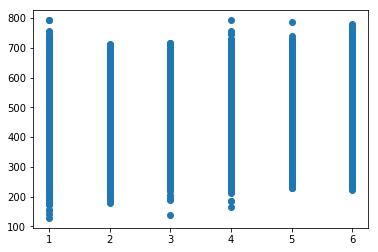

In [41]:
PISA_COR_MATH = PISA_20[['PA042Q01TA','MathScore']].copy()
PISA_COR_MATH = PISA_COR_MATH[(PISA_COR_MATH['PA042Q01TA'] != 'None')]
PISA_COR_MATH['QuesNumeric'] = PISA_COR_MATH['PA042Q01TA'].astype('float64')
print("Math correlations for",colname)
print(PISA_COR_MATH.corr())
plt.scatter(PISA_COR_MATH.QuesNumeric, PISA_COR_MATH.MathScore)


In [46]:
PISA_COR_MATH = PISA_20[['PA042Q01TA','MathScore']].copy()
PISA_COR_MATH = PISA_COR_MATH[(PISA_COR_MATH['PA042Q01TA'] != 'None')]
PISA_COR_MATH.describe




<bound method NDFrame.describe of        PA042Q01TA  MathScore
1             5.0     385.25
4             2.0     407.88
6             3.0     453.77
7             1.0     497.80
8             3.0     359.35
10            5.0     330.86
11            5.0     422.14
12            4.0     356.06
13            2.0     388.08
14            3.0     443.33
15            2.0     431.07
16            3.0     314.51
17            3.0     403.85
19            6.0     418.73
20            3.0     302.71
22            2.0     321.34
23            6.0     404.55
24            5.0     364.91
25            3.0     527.72
26            6.0     482.04
27            6.0     461.76
28            5.0     431.57
29            5.0     430.29
31            1.0     352.43
32            3.0     432.49
34            2.0     444.64
35            3.0     437.08
37            6.0     230.57
38            2.0     320.17
39            3.0     305.01
...           ...        ...
123086        3.0     392.60
123087   

In [53]:
PISA_Want_2 = PISA_COR_MATH.groupby(['PA042Q01TA'])
PISA_Want_3 = PISA_Want_2['MathScore'] 
PISA_4_Want = PISA_Want_3.agg('mean')
PISA_4_Want

PA042Q01TA
1.0   414.93
2.0   441.81
3.0   478.12
4.0   487.49
5.0   507.61
6.0   530.37
Name: MathScore, dtype: float64

In [50]:
PISA_COR_SCIE = PISA_20[['ST013Q01TA','ScieScore']].copy()
PISA_COR_SCIE = PISA_COR_SCIE[(PISA_COR_SCIE['ST013Q01TA'] != 'None')]

PISA_Want_5 = PISA_COR_SCIE.groupby(['ST013Q01TA'])
PISA_Want_6 = PISA_Want_5['ScieScore'] 
PISA_7_Want = PISA_Want_6.agg('mean')
PISA_7_Want

ST013Q01TA
1.0   415.37
2.0   442.95
3.0   490.46
4.0   514.47
5.0   541.97
6.0   526.42
Name: ScieScore, dtype: float64

In [52]:
PISA_COR_READ = PISA_20[['ST005Q01TA','ReadScore']].copy()
PISA_COR_READ = PISA_COR_READ[(PISA_COR_READ['ST005Q01TA'] != 'None')]

PISA_Want_8 = PISA_COR_READ.groupby(['ST005Q01TA'])
PISA_Want_9 = PISA_Want_8['ReadScore'] 
PISA_10_Want = PISA_Want_9.agg('mean')
PISA_10_Want

ST005Q01TA
1.0   495.31
2.0   475.06
3.0   441.39
4.0   419.11
5.0   392.27
Name: ReadScore, dtype: float64

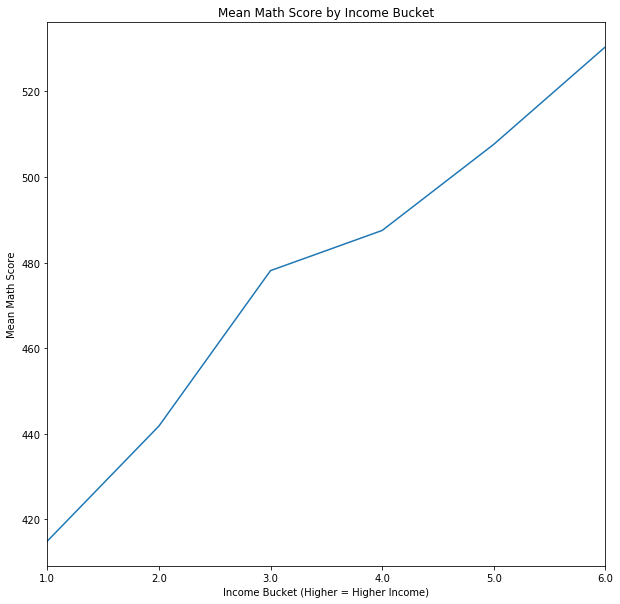

In [95]:
fig, a = plt.subplots()
PISA_4_Want.plot.line(title = "Mean Math Score by Income Bucket", figsize = (10,10))
a.set_xlabel('Income Bucket (Higher = Higher Income)')
a.set_ylabel('Mean Math Score')

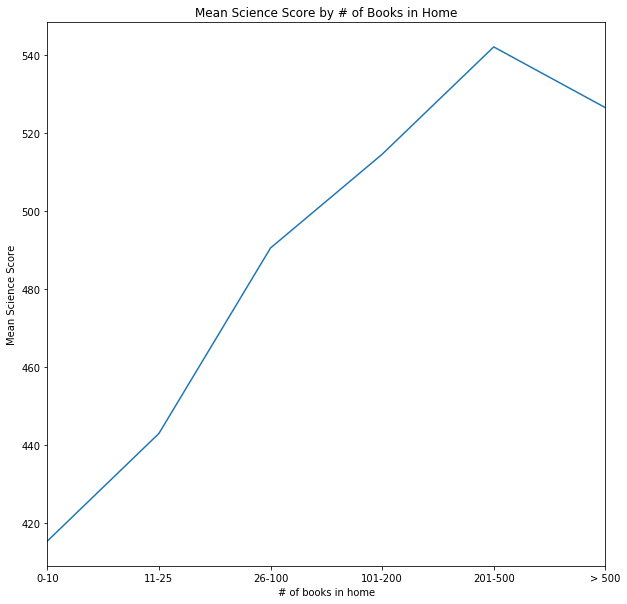

In [94]:
fig, b = plt.subplots()
PISA_7_Want.plot.line(title = "Mean Science Score by # of Books in Home", figsize = (10,10))
b.set_xlabel('# of books in home')
b.set_xticklabels(('0-10','11-25','26-100','101-200','201-500','> 500'))
b.set_ylabel('Mean Science Score')

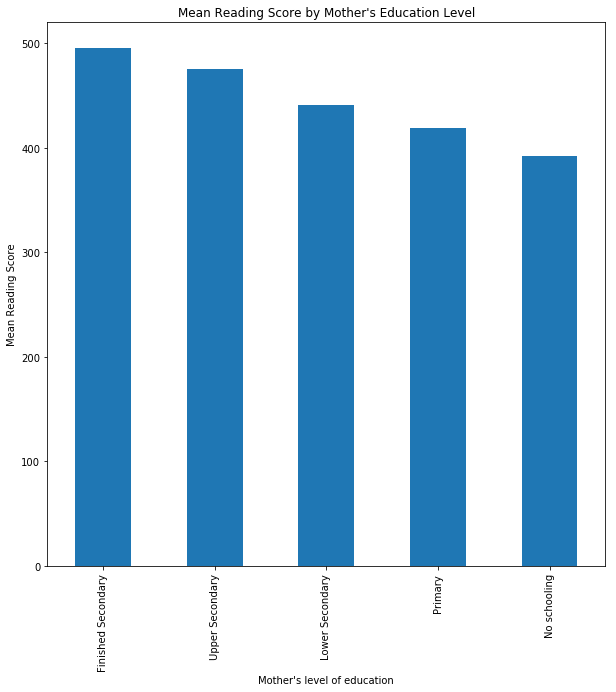

In [93]:
fig, c = plt.subplots()
PISA_10_Want.plot.bar(title = "Mean Reading Score by Mother's Education Level", figsize = (10,10))
c.set_xlabel("Mother's level of education")
c.set_xticklabels(('Finished Secondary','Upper Secondary','Lower Secondary','Primary','No schooling'))
c.set_ylabel('Mean Reading Score')